<a href="https://colab.research.google.com/github/DanielCadavid/InteligenciaArtificial/blob/main/aprendizajesupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizaje Supervisado


> A continuacion se presenta una implementacion de Algoritmos de clasificacion

##Regresion Lineal
Instalacion de Libreria



In [14]:
!pip3 install mglearn

Para demostrar el funcionamiento de la regresion lineal, se trae un set de datos "wave"

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


w[0]: 0.393906  b: -0.031804


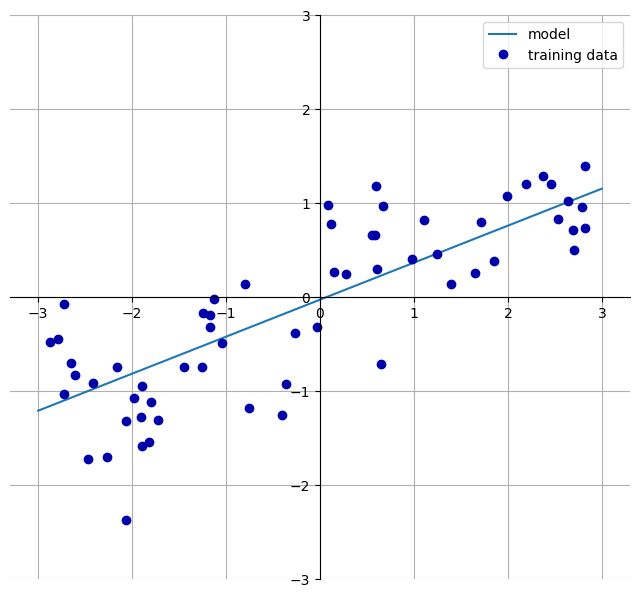

In [16]:
mglearn.plots.plot_linear_regression_wave()

La variable "lr.coef" posee el valor de los pesos en un arreglo de tipo NumPy, mientras "lr.intercept" almacena el valor del intercepto con el eje y



>Ahora se mostraran los resultados de entrenamiento y prueba

In [17]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


La regresion lineal tiene como objetivo encontrar los parametros de las variables que minimicen el error cuadratico entre las predicciones y el objetivo de la regresion.
El 66% no es un buen porcentaje en los entrenamientos, ademas se puede observar una minima diferencia frente a las pruebas. Lo que indica un desajuste o falta de datos, Por lo que vamos a ver un segundo ejemplo con un set de datos mas grande y con mas caracteristicas

In [18]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


El set de datos "Boston Housing" ha construido un modelo que muestra clara diferencia entre los valores de Entrenamiento (el cual mejoro al introducirle un set mas robusto) y los de Prueba, lo que lleva a deducir que hay un sobrellenado de informacion. El modelo de regresion lineal presenta ciertas fallas en cuanto al volumen y el control de la complejidad. Por ello se dictamina a la regresion ridge como una mejor opcion

##Modelo Linear de Regresion Ridge
Luego de traer el codigo al set de datos "Boston Housing", se obtienen resultados mas cercanos al 100%

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


El siguiente codigo muestra graficamente la aproximacion de dichos modelos

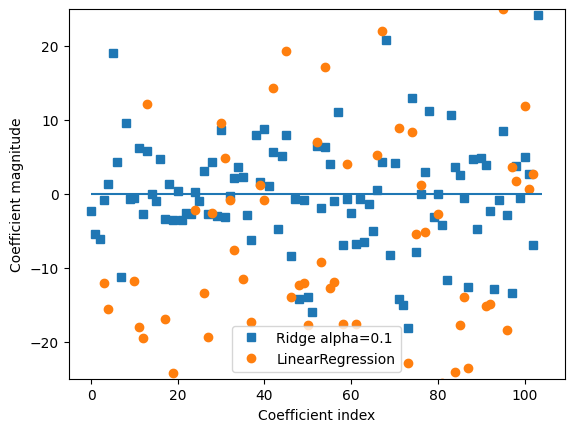

In [20]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

En la siguiente grafica se muestra el desempeno de la regresion lineal y el modelo ridge, donde la regrsion lineal necesita al menos 400 entradas para aprender algo

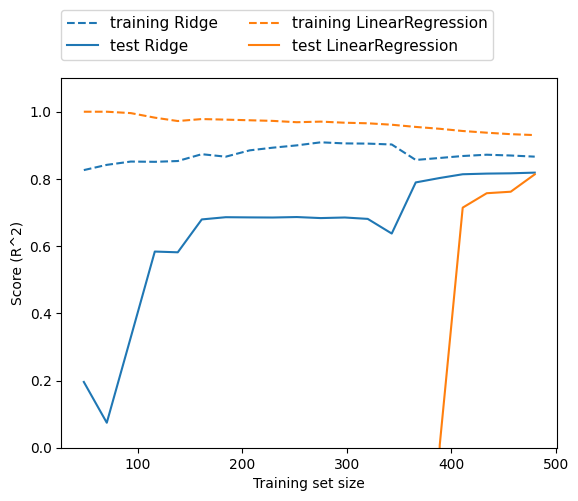

In [21]:
mglearn.plots.plot_ridge_n_samples()